In [1]:
## Imports
import os
import sys
import random

import numpy as np
import cv2
import matplotlib.pyplot as plt

import tensorflow as tf
from tensorflow import keras

from keras.layers import Input, Dense,Conv2D
from keras.models import Model 

## Seeding 
seed = 2019
random.seed = seed
np.random.seed = seed
tf.seed = seed

Using TensorFlow backend.


In [2]:
def LTP(img):
    
    #R = img.shape[0] 
    #C = img.shape[1]
    
    #b1 = np.ones((R+2, C+2))
    #R = R + 2
    #C = C + 2
    #b1[:b1.shape,:C] = img
    
    #img = img 
    img_row = img.shape[0]
    img_col = img.shape[1]
    
    N = []
    center = []
    for row in range(img.shape[0]-2): 
            for col in range(img.shape[1]-2):
             
                cen = img[row + 1, col + 1]
                t = 5
                        
                pix = img[row:row+3,col:col+3];
            
                center.append(cen)
            
                low = cen - t;
                high = cen + t;
                       
           
                pixels = pix 
            
            
                N.append(pixels)
    U = []
    L = []
    for k in range(len(N)):
        
        pixels = N[k]
        cen = center[k]
        low = cen - t;
        high = cen + t;
        out_LTP =np.zeros((3,3))
        for i in range(3):
            for j in range(3):
                if pixels[i][j] < low:
                    out_LTP[i][j] = -1
                elif pixels[i][j] > high:
                    out_LTP[i][j] = 1
                elif pixels[i][j] >= low & pixels[i][j] <= high:
                    out_LTP[i][j] = 0
        U.append(out_LTP)
    
    upper = []
    lower = []
    Oupper = []
    Olower = []
    reorder_vector = [5,2,1,0,3,6,7,8]
    for n in range(len(U)):
        UU = U[n]
        U_LTP = np.zeros((3,3))
        for r in range(3):
            for s in range(3):
                if UU[r][s] == -1:
                    U_LTP[r][s] = 0
                else: 
                    U_LTP[r][s] = UU[r][s]
        upper.append(U_LTP)
        U_LTP = U_LTP.ravel()
        order_upper = U_LTP[reorder_vector]
        order_upper = order_upper.astype(int)
        order_upper = order_upper.astype(str)
        order_upper = ''.join(order_upper)
        ltp_upper = int(order_upper,2)
        #if ltp_upper <= 0.0:
         #   ltp_upper = 0
        #else:
         #   ltp_upper = 1
        Oupper.append(ltp_upper)
    
        LL = U[n]
        L_LTP = np.zeros((3,3))
        for o in range(3):
            for m in range(3):
                if LL[o][m] == 1:
                    L_LTP[o][m] = 0
                elif LL[o][m] == -1:
                    L_LTP[o][m] = 1
                else:
                    L_LTP[o][m] = LL[o][m]
        lower.append(L_LTP)    
        L_LTP = L_LTP.ravel()
        order_lower = L_LTP[reorder_vector]
        order_lower = order_lower.astype(int)
        order_lower = order_lower.astype(str)
        order_lower = ''.join(order_lower)
        ltp_lower = int(order_lower,2) 
        #if ltp_lower <= 0.0:
         #   ltp_lower = 0
        #else:
         #   ltp_lower = 1
        Olower.append(ltp_lower)
    Olower = np.reshape(Olower,(img.shape[0]-2,img.shape[1]-2))
    Oupper = np.reshape(Oupper,(img.shape[0]-2,img.shape[0]-2))
    L_lower = np.ones((img.shape[0], img.shape[1]))
    L_lower[:img.shape[0]-2,:img.shape[1]-2] = Olower
    L_upper = np.ones((img.shape[0], img.shape[1]))
    L_upper[:img.shape[0]-2,:img.shape[1]-2] = Oupper
    return L_upper
          

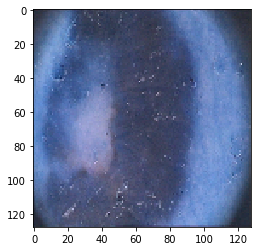

In [3]:
img = cv2.imread('IMD058.bmp')
img = cv2.resize(img,(128,128,))
#img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
img.shape   
plt.imshow(img)
plt.show()

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


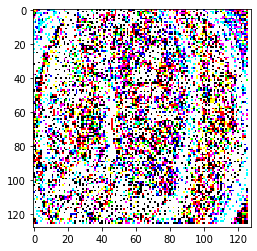

In [4]:
L = np.ones([128,128,3])
for i in range(img.shape[2]):
    L[:,:,i] = LTP(img[:,:,i])
plt.imshow(L)
plt.show()